## Códigos Parcial

In [65]:
import numpy as np

### Derivación

In [81]:
#Derivada de una lista
def dfdx(x_list,y_list,x):

    if x==x_list[0]:
        x0=x_list[0]
        y0=y_list[0]
        
        x1=x_list[1]
        y1=y_list[1]
        
        x2=x_list[2]
        y2=y_list[2]
    
        xj=x0
                
    elif x==x_list[len(x_list)-1]:
        x0=x_list[len(x_list)-1]
        y0=y_list[len(y_list)-1]
        
        x1=x_list[len(x_list)-2]
        y1=y_list[len(y_list)-2]
        
        x2=x_list[len(x_list)-3]
        y2=y_list[len(y_list)-2]
        
        xj=x0
        
    else:
        i=x_list.index(x)
        x0=x_list[i]
        y0=y_list[i]
        
        x1=x_list[i-1]
        y1=y_list[i-1]
        
        x2=x_list[i+1]
        y2=y_list[i+1]
        
        xj=x0
        
    dL0dx=(2*xj-x1-x2)/((x0-x1)*(x0-x2))  #Forward difference
    dL1dx=(2*xj-x0-x2)/((x1-x0)*(x1-x2))  #Central difference
    dL2dx=(2*xj-x0-x1)/((x2-x0)*(x2-x1))  #Backwards difference
    
    value=dL0dx*y0+dL1dx*y1+dL2dx*y2
    
    return value

x_list=[1,2,3,4,5,6]
y_list=[1,4,9,16,25,36]

print(dfdx(x_list,y_list,5.0))


from scipy.misc import derivative

def f(x):
    return x**2

derivative(f, 5.0, dx=1e-6)

10.0


10.00000000139778

### Puntos linealmente espaciados

In [71]:
def dfdxlinspace(x_list,y_list,x):
    
    h = abs(x_list[0]-x_list[1])
    
    if x==x_list[0]:
        value = (-1.5*y_list[0] + 2*y_list[1] - 0.5*y_list[2])/h
        
    elif x==x_list[len(x_list)-1]:
        value = (0.5*y_list[len(x_list)-3] - 2*y_list[len(x_list)-2] + 1.5*y_list[len(x_list)-1])/h
    
    else:
        i=x_list.index(x) 
        value = (-0.5*y_list[i-1] + 0.5*y_list[i+1])/h
    
    return value

print(dfdxlinspace(x_list,y_list,6.0))

12.0


### Segunda derivada

In [76]:
#linealmente espaciados

def d2fdx2(x_list,y_list,x):
    h = abs(x_list[0]-x_list[1])
    
    if x==x_list[0]:
        value = (-2*y_list[1] + y_list[0] + y_list[2])/h**2
        
    elif x==x_list[len(x_list)-1]:
        value = (y_list[len(x_list)-3] - 2*y_list[len(x_list)-2] + y_list[len(x_list)-1])/h**2
    
    else:
        i=x_list.index(x) 
        value = (y_list[i-1] - 2*y_list[i] +y_list[i+1])/h**2
    
    return value

print(d2fdx2(x_list,y_list,3.0))
    

2.0


### Integración

### Riemann

In [ ]:
def RiemannSum(f,a,b,n):
    
    deltax = abs(a-b)/n
    
    if n == 1:
        value = f((a-b)/2)
        
    else:
        v = np.linspace(a,b,n)
    
        sum = 0
    
        for i in range(1,len(v)-1):      #puntos de la derecha
            sum = sum + f(v[i])*deltax
        value = sum
        
    return value

### Riemann Doble

In [83]:
#Suma de Riemann en 2 variables

def RiemannSumDouble(f,a,b,c,d,n):
    
    deltax = abs(a-b)/n
    deltay = abs(c-d)/n

    if n == 1:
        value = f((a-b)/2,(c-d)/2)
        
    else:
        v = np.linspace(a,b,n)
        w = np.linspace(c,d,n)
        
        sum = 0
    
        for i in range(1,len(v)-1):                      #puntos de la derecha
            for j in range(1,len(w)-1):
                sum = sum + f(v[i],w[j])*deltax*deltay
        value = sum
        
    return value

### Trapecio compuesto

In [85]:
def TrapComp(f,a,b,n):
    #Separacion
    h = (b-a)/n
    
    #Calculando nodos
    x_node = np.zeros(n+1)
    for i in range(0,n+1):
        x_node[i] = a + i*h
        
    sum = 0
        
    for i in range(0,int(n)):
        sum += 0.5*h*(f(x_node[i])+f(x_node[i+1]))
    return sum

### Simpson Compuesto

In [86]:

def SimpComp(f,a,b,n):   
    #Separacion
    h = (b-a)/n
    
    #Calculando nodos
    x_node = np.zeros(n+1)
    for i in range(0,n+1):
        x_node[i] = a + i*h
        
    suma_impar = 0
    suma_par = 0
    
    for i in range(1,int(n/2)+1):   
        suma_impar += f(x_node[2*i-1])
        
    for i in range(1,int(n/2)):      
        suma_par += f(x_node[2*i])
        
    value = (h/3)*(f(a) + 2*suma_par + 4*suma_impar + f(b))
    return(value)

### Gauss

In [88]:
coeff = np.loadtxt("coeff.dat")

def GaussQuad(f,a,b,n):
    
    w_list = []
    z_list = []
    
    for i in range(0,coeff.shape[0]):
        if n == int(coeff[i][0]):
            w_list.append(coeff[i][2])
            z_list.append(coeff[i][1])
            
    sum = 0
    for i in range(0,n):
        argument = ((b-a)*z_list[i]+a+b)*0.5
        sum += w_list[i]*f(argument)
    value = sum*(b-a)*0.5
    
    return value

### Gauss dos variables $$ \int_a^b\int_c^d f(x,y)dxdy$$

In [89]:
coeff = np.loadtxt("coeff.dat")

def DoubleGauss(a,b,c,d,f,n,m):
    #pesos (w_i,w_j) y raices (z_i,t_j)
    
    w_i = []
    z_i = []
    
    for i in range(0,coeff.shape[0]):
        if(n == int(coeff[i][0])):
            w_i.append(coeff[i][2])
            z_i.append(coeff[i][1])
    
    w_j = []
    t_j = []
    
    for j in range(0,coeff.shape[0]):
        if(m == int(coeff[j][0])):
            w_j.append(coeff[j][2])
            t_j.append(coeff[j][1])
    
    #Integral
    sum_i = 0
    
    for i in range(0,int(n)):
        x_i = 0.5*((b-a)*z_i[i] + a + b)
        
        sum_j = 0
        
        for j in range(0,int(m)):
            y_j = 0.5*((d(x_i)+c(x_i))*t_j[j] + c(x_i) +d(x_i))
            
            sum_j += f(x_i,y_j)*w_i[i]*w_j[j]
            
        sum_i += sum_j*(d(x_i)-c(x_i))
    
    value = sum_i*0.25*(b-a)
    
    return value

### Gauss triple $$ \int_a^b\int_c^d\int_e^f g(x,y,z)dxdydz$$

In [90]:
def GaussTriple(a,b,c,d,e,f,g,n,m,l):
    
    #creando pesos (w_i,w_j,w_k) y raices (z_i,t_j,s_k)
    w_i=[]
    z_i=[]
    for i in range(0,coeff.shape[0]):
        if(n==int(coeff[i][0])):
            w_i.append(coeff[i][2])
            z_i.append(coeff[i][1])
    w_j=[]
    t_j=[]
    for j in range(0,coeff.shape[0]):
        if(m==int(coeff[j][0])):
            w_j.append(coeff[j][2])
            t_j.append(coeff[j][1])
       
    w_k=[]
    s_k=[]
    for k in range(0,coeff.shape[0]):
        if(l==int(coeff[k][0])):
            w_k.append(coeff[k][2])
            s_k.append(coeff[k][1])
    
    #Integración

    sum_i = 0.0
    
    for i in range(0,n):
        
        x_i=0.5*((b-a)*z_i[i]+a+b) #x(z_i)
        
        sum_j=0.0
        
        for j in range(0,m):
            
            y_j=0.5*((d(x_i)-c(x_i))*t_j[j] + c(x_i) + d(x_i))
            
            sum_k = 0.0
            
            for k in range(0,l):
                
                z_k = 0.5*((f(x_i,y_j)-e(x_i,y_j))*s_k[k] + f(x_i,y_j) + e(x_i,y_j))
                
                sum_k += w_k[k]*g(x_i,y_j,z_k)
            
            sum_j += w_j[j] * 0.5 * (f(x_i,y_j)-e(x_i,y_j)) * sum_k
                
        sum_i += w_i[i] * 0.5 * (d(x_i)-c(x_i)) * sum_j
        
    value = (b-a) * 0.5 * sum_i
                
    return value    

### Integrales impropias

# Álgebra lineal

In [324]:
A = [[1,1,0],[-1,2,3],[0,0,1]]
A = np.array(A)

# (A-lI)x = B = 0
B = [0,0,0]
B = np.array(B)


print(A)
print("")

print(cofactor(A,0,0))

[[ 1  1  0]
 [-1  2  3]
 [ 0  0  1]]

[[2 3]
 [0 1]]


### Pivote

In [325]:
#Devuelve la fila en la que se localiza un pivote

def row_pivote(A,fil,col):
    max_value = max(A[fil:,col])
    min_value = min(A[fil:,col])
    #return max_value
    if (abs(max_value)>=abs(min_value)):
        pivote = max_value
    else:
        pivote = min_value
    for i in range(0,A.shape[0]):
        if (A[i][col])==pivote:
            fila_pivote = i
    return fila_pivote


### Matriz triangular superior con contador de permutaciones

In [326]:
def TriangularSuperiorPerm(A):  

    n = A.shape[0]
    ATriangSup = np.zeros((n,n))
    ATriangSup[:,0:n] = A
    
    #Matriz triangular superior por eliminacion Gaussiana
    i = 0  #Contador sobre filas
    j = 0  #Contador sobre columnas
    permut = 0.0
    
    for h in range(j,n):        
        fila_pivote = row_pivote(ATriangSup,i,h)
        pivote = ATriangSup[fila_pivote][h]
        
        if (fila_pivote != i):
            ATriangSup[[fila_pivote,i]] = ATriangSup[[i,fila_pivote]] #Permutar filas
            permut = permut + 1.0
        
        for k in range(i+1,n):
            x = - ATriangSup[k][h]/pivote
            ATriangSup[k] = ATriangSup[k] + x*ATriangSup[i]
            
        i = i + 1
        j = j + 1
  
    Return = [ATriangSup,permut]
    
    return Return

### Determinante

In [327]:
def Det(A):
    n = A.shape[0]
    ATriangSup = TriangularSuperiorPerm(A)[0]
    diagprod = 1.0
    for i in range(0,n):
        diagprod *= ATriangSup[i][i]
    
    Sign = (-1)**TriangularSuperiorPerm(A)[1]
    
    return diagprod*Sign
print(Det(A))

3.0


### Cofactores

In [328]:
#Función con numeración de filas y columnas según python

def cofactor(A,row,col):
    Atemp = A
    Atemp = np.delete(Atemp,row, 0)
    Atemp = np.delete(Atemp,col, 1)
    return Atemp
print(cofactor(A,0,1))

[[-1  3]
 [ 0  1]]


### Adjunta

In [329]:
def adjunta(A):
    n = A.shape[0]
    Adj = np.zeros((n,n))
    
    for i in range(0,n):
        for j in range(0,n):
            Adj[i][j] = Det(cofactor(A,i,j))*(-1)**(i+j)
    return Adj
print(adjunta(A))

[[ 2.  1. -0.]
 [-1.  1. -0.]
 [ 3. -3.  3.]]


### Inversa

In [330]:
def InverseMatrix(A):
     
    #Matriz aumentada
    n = A.shape[0]
    
    Ainv = np.zeros((n,2*n))
    
    Ainv[:,0:n] = A
    
    #Aumentada con la identidad
    for i in range(0,n):
        Ainv[i][i+n] = 1.0
    
    #return Ainv
    #Matriz triangular superior por eliminacion Gaussiana
    
    i = 0  #Contador sobre filas
    j = 0  #Contador sobre columnas
    
    for h in range(j,n-1):                       #No se consideran columnas de I
        fila_pivote = row_pivote(Ainv,i,h)
        pivote = Ainv[fila_pivote][h]
        
        if (fila_pivote != i):
            Ainv[[fila_pivote,i]] = Ainv[[i,fila_pivote]]   #Permutar filas
        
        for k in range(i+1,n):
            x = - Ainv[k][h]/pivote
            Ainv[k] = Ainv[k] + x*Ainv[i]
            
        i = i + 1
        j = j + 1
        
       
    for i in range(0,n):
        Ainv[i] = Ainv[i]/Ainv[i][i]      

    #return Ainv     
    
    for j in range(n-1,0,-1):
        for i in range(j-1,-1,-1):
            x = - Ainv[i][j]
            Ainv[i] = Ainv[i] + x*Ainv[j]
 
    #return Ainv
    
    AINV = np.zeros((n,n))
    AINV = Ainv[:,n:2*n] 
            
    return AINV
print(InverseMatrix(A))

[[ 0.66666667 -0.33333333  1.        ]
 [ 0.33333333  0.33333333 -1.        ]
 [ 0.          0.          1.        ]]


### Transpuesta

In [331]:
def Mtrans(A):
    if (A.shape[0] == A.shape[1]):

        C = np.zeros(A.shape)
        
        for i in range(0,A.shape[0]):
            for j in range(0,A.shape[1]):
                C[i][j] = A[j][i]
        return C

### Producto

In [332]:
def Mprod(A,B):
    if (A.shape[1] == B.shape[0]):
        C = np.zeros((A.shape[1],B.shape[0]))
        
        for i in range(0,A.shape[0]):
            
            for j in range(0,B.shape[1]):
                
                sum = 0
                for k in range(0,A.shape[1]):
                    sum += A[i][k]*B[k][j]
                C[i][j] = sum
        return C

### Traza

In [333]:
def Mtraz(A):
    if (A.shape[0] == A.shape[1]):
        sum = 0
        for i in range(0,A.shape[0]):
            sum += A[i][i]
        return sum

### Solución a sistema de ec.

In [334]:
def GaussSolver(A,B):
    
    ####################
    
    #Matriz aumentada
    n = A.shape[0]
    m = A.shape[1]
    
    AB = np.zeros((n,m+1))
    
    AB[:,0:m] = A
    
    for i in range(0,len(B)):
        AB[i][m] = B[i]
    
    #return AB
    
    #############
    #Eliminacion Gaussiana
    
    i = 0  #Contador sobre filas
    j = 0  #Contador sobre columnas
    
    for h in range(j,m-1):                       #No se considera la columna B
        fila_pivote = row_pivote(AB,i,h)
        pivote = AB[fila_pivote][h]
        
        if (fila_pivote != i):
            AB[[fila_pivote,i]] = AB[[i,fila_pivote]]   #Permutar filas
        
        for k in range(i+1,n):
            x = - AB[k][h]/pivote
            AB[k] = AB[k] + x*AB[i]
            
        i = i + 1
        j = j + 1
  
    #return AB
     ######################
        
    #Solucion    
    x_sol = np.zeros(n)
    for i in range(n-1,-1,-1):
        
        if (i == n-1):
            x_sol[i] = AB[i][m] / AB[i][i]
        else:
            sum = 0
            for j in range(i+1,m):
                sum += AB[i][j]*x_sol[j]
            x_sol[i] = (AB[i][m] -sum) / AB[i][i]
            
    return x_sol,AB

### Chop

In [335]:
def chop(expr, *, max=0.3):
    return [i if i > max else 0 for i in expr]

### Eigenvalor

In [336]:
def eigenvalue(A):
    AA = Mprod(A,A)
    AAA = Mprod(A,AA)
    
    a0 = 1/6 * (Mtraz(A)**3 + 2*Mtraz(AAA) - 3*Mtraz(A)*Mtraz(AA))
    a1 = -1/2 * (Mtraz(A)*Mtraz(A)-Mtraz(AA))
    a2 = Mtraz(A)
    a3 = -1.0
    
    coefficients = [a3,a2,a1,a0]
    eigenvalues = np.roots(coefficients) 

    return eigenvalues

print(eigenvalue(A))

[1.5+0.8660254j 1.5-0.8660254j 1. +0.j       ]


### Eigenvector

In [337]:
def eigenvector(A,L):        #L es eigenvalor
    matrix = A - L*np.identity(3)
    eigmatrix = GaussSolver(matrix,B)[1]
    n = matrix.shape[0]
    
    Eigenvector = np.zeros(n)
    
    for i in range(n-1,-1,-1):    
        if (i == n-1):
            Eigenvector[i] = 1.0
        else:
            sum = 0
            for j in range(i+1,n):
                sum += eigmatrix[i][j]*Eigenvector[j]
            Eigenvector[i] = (eigmatrix[i][n] -sum) / eigmatrix[i][i]
                
    return(Eigenvector)

In [338]:
print(eigenvector(A,1.5))

[4. 2. 1.]


### 3D PLOT

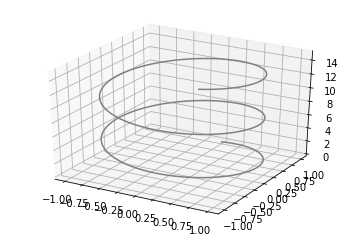

In [344]:
from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)

ax.plot3D(xline, yline, zline, 'gray')

#fig = plt.figure()
#ax = plt.axes(projection='3d')


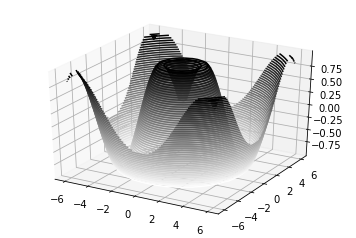

In [352]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.contour3D(X, Y, Z, 50, cmap='binary')

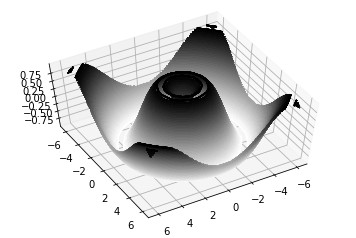

In [363]:
ax.contour3D(X, Y, Z, 50, cmap='binary')

ax.view_init(60, 60)
fig

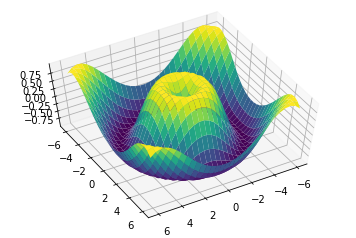

In [374]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.view_init(60, 60)

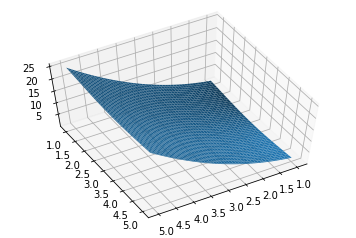

In [394]:
x = np.linspace(1,5,100)
y = np.linspace(1,5,100)

X, Y = np.meshgrid(x,y)

def f(x,y):
    value = x**2+ np.cos(y)
    return value
Z = f(X,Y)

ax = plt.axes(projection = '3d')
ax.plot_surface(X,Y,Z)

ax.view_init(60,60)

### Heatmaps

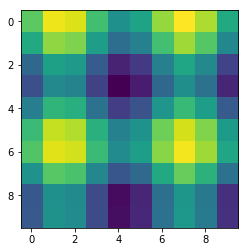

In [477]:
X , Y= np.linspace(0,10,10), np.linspace(0,10,10)

def f(x,y):
    value = np.sin(x) + np.cos(y)
    return value

X,Y = np.meshgrid(X, Y)
heat = f(X, Y)

#print(heat)
plt.imshow(heat)

TypeError: Input must be a 2D array.

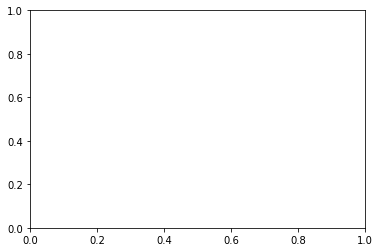

In [490]:
A = np.loadtxt("T0.dat")

X = A[:,0]
Y = A[:,1]
T = A[:,2]

A = np.meshgrid(X,Y,T)

plt.contour(A)
